In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data2 = pd.read_csv('Weather Data.csv')

In [20]:
data2



,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            8784 non-null   float64
 1   Dew Point Temp_C  8784 non-null   float64
 2   Rel Hum_%         8784 non-null   int64  
 3   Wind Speed_km/h   8784 non-null   int64  
 4   Visibility_km     8784 non-null   float64
 5   Press_kPa         8784 non-null   float64
 6   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 480.5+ KB


In [21]:
data2.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [22]:
data2.drop(['Date/Time'],axis= 1,inplace=True)

In [23]:
data2.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,Fog


In [10]:
data2.Weather = data2.Weather.apply(lambda x: 'other' if x in ['Drizzle','Haze','Freezing Drizzle','Freezing Drizzle,Haze','Thunderstorms'] else x)

In [28]:
data.Weather = data.Weather.apply(lambda x: 'Clear' if 'Clear' in x else x)

data.Weather = data.Weather.apply(lambda x: 'Cloudy' if 'Cloudy' in x else x)

data.Weather = data.Weather.apply(lambda x: 'Rain' if 'Rain' in x else x)
data.Weather = data.Weather.apply(lambda x: 'Snow' if 'Snow' in x else x)
data.Weather = data.Weather.apply(lambda x: 'Fog' if 'Fog' in x else x)


In [29]:
data.Weather.unique()

array(['Fog', 'Cloudy', 'Rain', 'Clear', 'Snow', 'other'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
x = data2.drop(['Weather'],axis=1)
y = data2.Weather

In [32]:
y = le.fit_transform(y)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=23)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
dtc = DecisionTreeClassifier(max_depth=17, random_state=42)

In [128]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=17, random_state=42)

In [129]:
y_pred= dtc.predict(x_train)
y_pred_test = dtc.predict(x_test)

In [130]:
y_pred

array([23, 23, 19, ..., 23, 19,  1])

In [131]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,r2_score

In [132]:
r2_score(y_train,y_pred)

0.8761566341973779

In [133]:
r2_score(y_test,y_pred_test)

-0.4433657515944769

🌲 Base Random Forest Results
--------------------------------
Train Accuracy: 0.9997
Test Accuracy:  0.5401


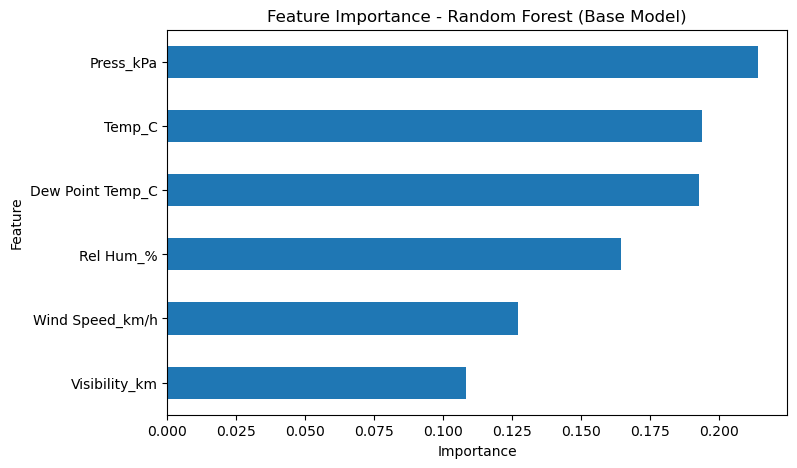


🎯 After Feature Selection
--------------------------------
Train Accuracy: 0.9997
Test Accuracy:  0.5401


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



📊 Cross Validation Mean Accuracy: 0.2816
CV Scores: [0.24075128 0.30221969 0.28457598 0.32100171 0.25968109]


In [135]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 1️⃣ Load dataset
data = pd.read_csv("Weather Data.csv")

# 2️⃣ Prepare features and target
X = data.drop(columns=['Date/Time', 'Weather'])
y = data['Weather']

# 3️⃣ Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4️⃣ Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5️⃣ Base Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=17, random_state=42)
rf.fit(X_train, y_train)

base_train = rf.score(X_train, y_train)
base_test = rf.score(X_test, y_test)

print("🌲 Base Random Forest Results")
print("--------------------------------")
print(f"Train Accuracy: {base_train:.4f}")
print(f"Test Accuracy:  {base_test:.4f}")

# 6️⃣ Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance - Random Forest (Base Model)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 7️⃣ Drop low-importance features (< 0.05)
threshold = 0.05
important_features = importances[importances > threshold].index
X_new = X[important_features]

# 8️⃣ Split again
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y_encoded, test_size=0.2, random_state=42)

# 9️⃣ Retrain model on selected features
rf2 = RandomForestClassifier(n_estimators=200, max_depth=17, random_state=42)
rf2.fit(X_train_new, y_train)

train_acc2 = rf2.score(X_train_new, y_train)
test_acc2 = rf2.score(X_test_new, y_test)

print("\n🎯 After Feature Selection")
print("--------------------------------")
print(f"Train Accuracy: {train_acc2:.4f}")
print(f"Test Accuracy:  {test_acc2:.4f}")

# 🔟 Cross Validation (5-fold)
cv_scores = cross_val_score(rf2, X_new, y_encoded, cv=5)
print(f"\n📊 Cross Validation Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"CV Scores: {cv_scores}")
